# Imports and setup

In [16]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [17]:
sns.set()

# Preprocessing


In [18]:
path = "train_1/train_1.csv"

In [19]:
train_1 = pd.read_csv(path)
train_1

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
train_1['name'] = [data.split('.')[-3] for data in train_1['Page']]
train_1['project'] = [data.split('.')[-2] for data in train_1['Page']]
train_1['agent'] = [data.split('.')[-1] for data in train_1['Page']]
train_1['language'] = train_1['name'].apply(lambda x: x[-2:]) #fix for ns and ww 
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,name,project,agent,language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1_zh,wikipedia,org_all-access_spider,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM_zh,wikipedia,org_all-access_spider,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C_zh,wikipedia,org_all-access_spider,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute_zh,wikipedia,org_all-access_spider,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You_zh,wikipedia,org_all-access_spider,zh


In [21]:
train_1['language'] = train_1['language'].apply(lambda x: "None" if x in ['ww','ns'] else x)
train_1

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,name,project,agent,language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1_zh,wikipedia,org_all-access_spider,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM_zh,wikipedia,org_all-access_spider,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C_zh,wikipedia,org_all-access_spider,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute_zh,wikipedia,org_all-access_spider,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You_zh,wikipedia,org_all-access_spider,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,13.0,3.0,5.0,10.0,Underworld_(serie_de_películas)_es,wikipedia,org_all-access_spider,es
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Resident_Evil:_Capítulo_Final_es,wikipedia,org_all-access_spider,es
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Enamorándome_de_Ramón_es,wikipedia,org_all-access_spider,es
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Hasta_el_último_hombre_es,wikipedia,org_all-access_spider,es


In [22]:
print(set(train_1['project']),set(train_1['agent']),set(train_1['language']))

{'mediawiki', 'wikipedia', 'wikimedia'} {'org_desktop_all-agents', 'org_all-access_all-agents', 'org_mobile-web_all-agents', 'org_all-access_spider'} {'de', 'es', 'fr', 'en', 'None', 'ru', 'ja', 'zh'}


In [23]:
#number of null values in each row (for each page)
null_per_row = train_1.isnull().sum(axis=1)
null_per_row[null_per_row>550%75]

4         291
6         365
10         31
13        212
19        351
         ... 
145058    544
145059    550
145060    550
145061    550
145062    550
Length: 23072, dtype: int64

# EDA

c:\users\vedan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

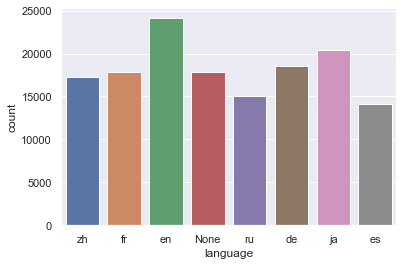

In [24]:
sns.countplot(train_1['language'])

c:\users\vedan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agent', ylabel='count'>

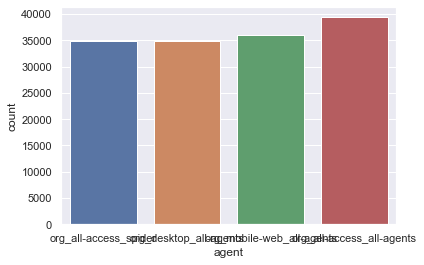

In [25]:
sns.countplot(train_1['agent'])

c:\users\vedan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='project', ylabel='count'>

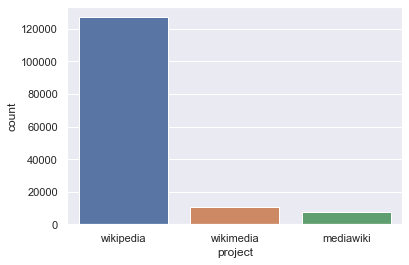

In [26]:
sns.countplot(train_1['project'])

In [27]:
train_1[train_1['language']=="None"]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,name,project,agent,language
13332,Accueil_commons.wikimedia.org_all-access_spider,55.0,48.0,44.0,35.0,46.0,41.0,32.0,43.0,40.0,...,88.0,57.0,74.0,61.0,51.0,60.0,Accueil_commons,wikimedia,org_all-access_spider,None
13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,5.0,3.0,4.0,6.0,3.0,1.0,5.0,6.0,6.0,...,31.0,29.0,37.0,32.0,29.0,34.0,Atlas_of_Asia_commons,wikimedia,org_all-access_spider,None
13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,4.0,6.0,9.0,7.0,6.0,4.0,5.0,6.0,13.0,...,35.0,31.0,31.0,34.0,28.0,27.0,Atlas_of_Europe_commons,wikimedia,org_all-access_spider,None
13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,5.0,2.0,6.0,6.0,8.0,11.0,5.0,5.0,6.0,...,8.0,8.0,13.0,5.0,11.0,6.0,Atlas_of_World_War_II_commons,wikimedia,org_all-access_spider,None
13336,Atlas_of_colonialism_commons.wikimedia.org_all...,8.0,6.0,15.0,5.0,5.0,9.0,10.0,3.0,9.0,...,29.0,19.0,30.0,29.0,26.0,26.0,Atlas_of_colonialism_commons,wikimedia,org_all-access_spider,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84730,help:contents_www.mediawiki.org_all-access_spider,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,...,7.0,18.0,17.0,15.0,3.0,11.0,help:contents_www,mediawiki,org_all-access_spider,None
84731,how_to_contribute_www.mediawiki.org_all-access...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,172.0,19.0,29.0,2.0,178.0,how_to_contribute_www,mediawiki,org_all-access_spider,None
84732,mediawiki_www.mediawiki.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,12.0,51.0,23.0,3.0,48.0,mediawiki_www,mediawiki,org_all-access_spider,None
84733,special:book_www.mediawiki.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,300.0,3.0,44.0,6.0,0.0,154.0,special:book_www,mediawiki,org_all-access_spider,None
